In [1]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/Complete_Data/All_Four_Datasets.csv')


In [3]:
df.head()

,Date,Public Holidays,School Holidays,labor force,employment,unemployment,unemployment rate,Area,DAY,MONTH,...,February,January,July,June,March,May,November,October,September,Payday
0,2010-01-01,True,True,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",Friday,January,...,0,1,0,0,0,0,0,0,0,True
1,2010-01-02,False,False,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",Saturday,January,...,0,1,0,0,0,0,0,0,0,False
2,2010-01-03,False,False,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",Sunday,January,...,0,1,0,0,0,0,0,0,0,False
3,2010-01-04,False,False,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",Monday,January,...,0,1,0,0,0,0,0,0,0,False
4,2010-01-05,False,False,3097652,2884050,213602,6.9,"Washington-Arlington-Alexandria, DC-VA-MD-WV M...",Tuesday,January,...,0,1,0,0,0,0,0,0,0,False


In [4]:
df.columns

Index(['Date', 'Public Holidays', 'School Holidays', 'labor force',
       'employment', 'unemployment', 'unemployment rate', 'Area', 'DAY',
       'MONTH', 'ARSON', 'ASSAULT W/DANGEROUS WEAPON', 'BURGLARY', 'HOMICIDE',
       'MOTOR VEHICLE THEFT', 'ROBBERY', 'SEX ABUSE', 'THEFT F/AUTO',
       'THEFT/OTHER', 'TOTAL', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'TOBS',
       'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'April', 'August', 'December', 'February', 'January',
       'July', 'June', 'March', 'May', 'November', 'October', 'September',
       'Payday'],
      dtype='object')

In [5]:
df.isna().sum()

Date                          0
Public Holidays               0
School Holidays               0
labor force                   0
employment                    0
unemployment                  0
unemployment rate             0
Area                          0
DAY                           0
MONTH                         0
ARSON                         0
ASSAULT W/DANGEROUS WEAPON    0
BURGLARY                      0
HOMICIDE                      0
MOTOR VEHICLE THEFT           0
ROBBERY                       0
SEX ABUSE                     0
THEFT F/AUTO                  0
THEFT/OTHER                   0
TOTAL                         0
PRCP                          0
SNOW                          0
SNWD                          0
TMAX                          0
TMIN                          0
TOBS                          0
Friday                        0
Monday                        0
Saturday                      0
Sunday                        0
Thursday                      0
Tuesday 

In [6]:
df["TOBS"] = df["TOBS"].fillna(df["TOBS"].mean())

In [7]:
df.isna().sum()

Date                          0
Public Holidays               0
School Holidays               0
labor force                   0
employment                    0
unemployment                  0
unemployment rate             0
Area                          0
DAY                           0
MONTH                         0
ARSON                         0
ASSAULT W/DANGEROUS WEAPON    0
BURGLARY                      0
HOMICIDE                      0
MOTOR VEHICLE THEFT           0
ROBBERY                       0
SEX ABUSE                     0
THEFT F/AUTO                  0
THEFT/OTHER                   0
TOTAL                         0
PRCP                          0
SNOW                          0
SNWD                          0
TMAX                          0
TMIN                          0
TOBS                          0
Friday                        0
Monday                        0
Saturday                      0
Sunday                        0
Thursday                      0
Tuesday 

In [8]:
df.columns

Index(['Date', 'Public Holidays', 'School Holidays', 'labor force',
       'employment', 'unemployment', 'unemployment rate', 'Area', 'DAY',
       'MONTH', 'ARSON', 'ASSAULT W/DANGEROUS WEAPON', 'BURGLARY', 'HOMICIDE',
       'MOTOR VEHICLE THEFT', 'ROBBERY', 'SEX ABUSE', 'THEFT F/AUTO',
       'THEFT/OTHER', 'TOTAL', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'TOBS',
       'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'April', 'August', 'December', 'February', 'January',
       'July', 'June', 'March', 'May', 'November', 'October', 'September',
       'Payday'],
      dtype='object')

In [15]:
df['Date']=pd.to_datetime(df['Date']).dt.date
predictors = ['Public Holidays','School Holidays','Payday','unemployment rate','PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN','Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday','Wednesday', 'April', 'August', 'December', 'February', 'January','July', 'June', 'March', 'May', 'November', 'October', 'September']
target = 'TOTAL'
X = df[predictors]
y = df[target]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)

In [26]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(2629, 28)
(2629,)
(658, 28)
(658,)


In [27]:
# Linear Regression
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
print("Linear Regression train scores: ", reg.score(x_train,y_train))
print("Linear Regression test scores: ", reg.score(x_test,y_test))

Linear Regression train scores:  0.39810459263596587
Linear Regression test scores:  0.38798164154678116


In [29]:
tree_reg1 = DecisionTreeRegressor(max_depth=5)
tree_reg1.fit(x_train, y_train)
print("Decision Tree train scores: ", tree_reg1.score(x_train,y_train))
print("Decision Tree test scores: ", tree_reg1.score(x_test,y_test))

Decision Tree train scores:  0.38785804726139883
Decision Tree test scores:  0.31063564658491616


In [30]:
#from sklearn.preprocessing import StandardScaler

#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)
def mean_absolute_percentage_error1(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
import math
from sklearn.metrics import mean_absolute_error
Depth = [1,2,3,4,5,6,7,8,9,10]
from sklearn import metrics
Train_Scores = []
Test_Scores = []
for i in Depth:
    regressor = RandomForestRegressor(n_estimators=257, random_state=0, max_depth = i)
    regressor.fit(x_train, y_train)
    y_pred = regressor.predict(x_test)
    print("When Estimators are: ",257)
    print("Random Forest test  R2 scores: ", regressor.score(x_test, y_test))
    print("RF MSE for test data is",mean_squared_error(y_test, y_pred))
    print("RF RMSE for test data is",math.sqrt(mean_squared_error(y_test, y_pred)))
    print("RF MAE for test data is",mean_absolute_error(y_test, y_pred))
    print("RF MAPE for test data is",mean_absolute_percentage_error1(y_test, y_pred))
    print("-----------------------------------------------------------------")
    Y_pred1 = regressor.predict(x_train)
    print("r2 for train data is",regressor.score(x_train, y_train))
    print("MSE for train data is",mean_squared_error(y_train, Y_pred1))
    print("RMSE for train data is",math.sqrt(mean_squared_error(y_train, Y_pred1)))
    print("MAE for train data is",mean_absolute_error(y_train, Y_pred1))
    print("MAPE for train data is",mean_absolute_percentage_error1(y_train, Y_pred1))
    print("==================================================================")
    Train_Scores.append(regressor.score(x_train, y_train))
    Test_Scores.append(regressor.score(x_test, y_test))
    

When Estimators are:  257
Random Forest test  R2 scores:  0.1511672469329829
RF MSE for test data is 328.3667954068368
RF RMSE for test data is 18.12089389094359
RF MAE for test data is 14.419743116323735
RF MAPE for test data is 16.085698958126756
-----------------------------------------------------------------
r2 for train data is 0.171003692968957
MSE for train data is 290.16220525804636
RMSE for train data is 17.034148210522485
MAE for train data is 13.457617888725368
MAPE for train data is 15.504543443341367
When Estimators are:  257
Random Forest test  R2 scores:  0.21910756146098465
RF MSE for test data is 302.08441730598713
RF RMSE for test data is 17.38057586232364
RF MAE for test data is 13.833185473004255
RF MAPE for test data is 15.399536091584922
-----------------------------------------------------------------
r2 for train data is 0.25741095856043206
MSE for train data is 259.9182554096651
RMSE for train data is 16.121980505188098
MAE for train data is 12.752461582905791

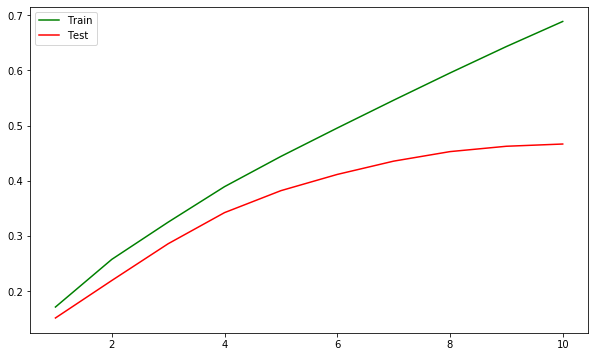

In [37]:
plt.figure(figsize=(10,6))
plt.plot(Depth, Train_Scores, color ='green', label="Train")
plt.plot(Depth, Test_Scores, color ='Red', label ="Test")
plt.legend()

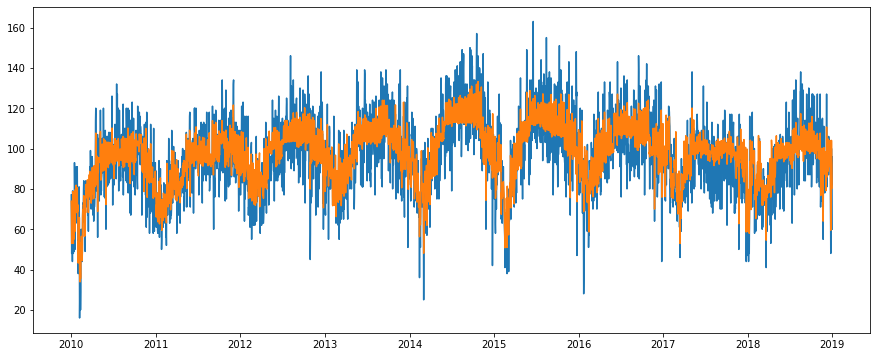

In [38]:
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
regressor = RandomForestRegressor(n_estimators=257, random_state=0, max_depth = 10)
regressor.fit(x_train, y_train)
plt.figure(figsize=(15,6))
plt.plot(df['Date'], df['TOTAL'])
plt.plot(df['Date'], regressor.predict(df[predictors]))

In [39]:
## Recursive feature elimination


In [44]:
from sklearn.feature_selection import RFE
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
#from sklearn.svm import SVR
#X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
estimator = RandomForestRegressor(n_estimators=257, random_state=0, max_depth = 10)
selector = RFE(estimator, 4, step=1)
selector = selector.fit(x_train, y_train)
y_predict = selector.predict(x_test)
print(selector.score(x_test, y_test))
print(selector.support_)
print(selector.ranking_)
col = x_test.columns
col[selector.support_]

0.340934061938652
[False False False  True  True False False  True  True False False False
 False False False False False False False False False False False False
 False False False False]
[ 7  8 14  1  1 22 10  1  1  2 16  5 12 13 19 21  4 24 15  6 20 23 25  3
 11 17  9 18]


Index(['unemployment rate', 'PRCP', 'TMAX', 'TMIN'], dtype='object')

In [43]:
from sklearn.feature_selection import RFE
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
#from sklearn.svm import SVR
#X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
estimator = RandomForestRegressor(n_estimators=257, random_state=0, max_depth = 10)
selector = RFE(estimator, 5, step=1)
selector = selector.fit(x_train, y_train)
y_predict = selector.predict(x_test)
print(selector.score(x_test, y_test))
print(selector.support_)
print(selector.ranking_)
col = x_test.columns
col[selector.support_]

0.37062226835287704
[False False False  True  True False False  True  True  True False False
 False False False False False False False False False False False False
 False False False False]
[ 6  7 13  1  1 21  9  1  1  1 15  4 11 12 18 20  3 23 14  5 19 22 24  2
 10 16  8 17]


Index(['unemployment rate', 'PRCP', 'TMAX', 'TMIN', 'Friday'], dtype='object')